# Q&A Activity Question Week -09

### Do the following on the dataset
### 1. Explain the dataset
### 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.
### 3. The manager wants to find out whether the same amount was spentfor the three advertisements (TV , Radio and Newspaper). Comment on your findings

### Importing the Dependancies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import scipy
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.read_csv("Advertising.csv")

# 1. Explain the dataset

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.shape

(200, 5)

<AxesSubplot:>

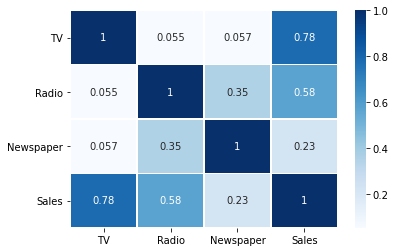

In [7]:
data = df.drop(["Unnamed: 0"],axis=1)
corrmatrix=data.corr()
sns.heatmap(corrmatrix,annot=True,linewidth=0.2,cmap="Blues")

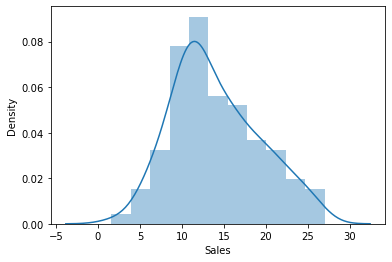

In [8]:
Sales=df['Sales']
sns.distplot(Sales)
plt.show()

Text(0.5, 1.0, ' Newspaper')

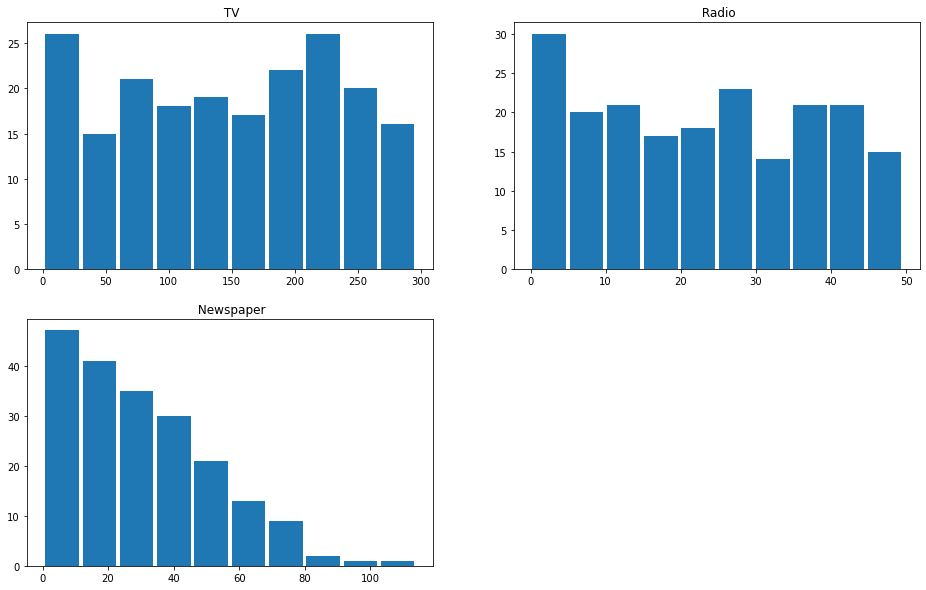

In [9]:
fig, axes = plt.subplots( figsize=(16, 10))
plt.subplot(2,2,1)
plt.hist(df['TV'],rwidth=0.9)
plt.title(' TV')
plt.subplot(2,2,2)
plt.hist(df['Radio'],rwidth=0.9)
plt.title(' Radio')
plt.subplot(2,2,3)
plt.hist(df['Newspaper'], rwidth=0.9)
plt.title(' Newspaper')

**Findings**

* Data set cosists of 200 rows and 5 columns.

* There are no null values in the data set.

* Sales is normally distributed while that of Newspaper advertisement is right skewed

# 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


**Findings**


**1. Maximum**

* Maximum amount spent for adverstiement is through TV (296.400000)
* Maximum amount generated for sales through these 3 set of adverstiements is 27.00

**2. Minimum**

* The least amount spent was for advertisements through Radio of nearly zero.
* Lowest amount generated for sales through these 3 set of adverstiements is 1.60

**3. Average**

* The average amount spent is the highest for TV ads followed by Newspaper and Radio ads.
* Average amount for sales is 14.02

**4. Median**

* Median or 50% amount spent for
* TV -149.750000
* Radio -22.900000,
* Newspaper -25.750000

**5. Percentiles**

* 75% of time,amount spent for TV ads is more than 74.375, , for Newspaper it was more than 12.750 & for Radio-9.97500
* 25% of time ,amount spent for TV ads is more than 218.825, followed by Newsaper of 45.100 & for Radio-36.525000
* 75% of time,amount for sales generated is more than 10.375000
* 25% of time ,amount or sales generated is more than 17.400000

# 3. The manager wants to find out whether the same amount was spentfor the three advertisements (TV , Radio and Newspaper). Comment on your findings

## One way ANOVA

### H0 = Amount spent for the three advertisements are equal
### H1 = Different amount is spent for the three advertisements.


In [11]:
#finding f_critical value
from scipy.stats import f 
df_n = 2
df_d = 197
f_critical = f.ppf(1-0.05,df_n,df_d)
print('Value of f_critical is',round(f_critical,4))

Value of f_critical is 3.0418


In [12]:
#determining f_value and p_value
f_val, p_val = scipy.stats.f_oneway(df['TV'], df['Radio'], df['Newspaper'])

print('F_Statistic Value is',f_val)
print('\nP Value is',p_val)

if(p_val <= 0.05):
    print("\nThe p_value is less than significant value. Hence we reject the Null Hypothesis")
    print("Amount spent for the three advertisements (TV , Radio and Newspaper) were not same.")
    
else:
    print("\nWe accept null hypothesis")
    print("Same amount was spent for the three advertisements (TV , Radio and Newspaper).")

F_Statistic Value is 358.8514595342597

P Value is 4.552931539744962e-103

The p_value is less than significant value. Hence we reject the Null Hypothesis
Amount spent for the three advertisements (TV , Radio and Newspaper) were not same.


In [13]:
#Submitted by DSA_B3_GROUP12
#GroupMembers: Akshaya V, Shiffa Saleem, Sujith Narayanan, Sidharth S, Navaneeth R

### END